# WeatherPy

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   # f"{url}q={city}&appid={weather_api_key}
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sipalay
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | altay
Processing Record 8 of Set 1 | sorong
Processing Record 9 of Set 1 | kharan
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | thunder bay
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | bulawayo
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | lodja
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | olonkinbyen
Processing Record 23 of Set 1 | coqu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sipalay,9.7500,122.5000,85.75,71,100,2.95,PH,1718007936
1,thompson,55.7435,-97.8558,35.76,87,0,0.00,CA,1718007936
2,kerikeri,-35.2268,173.9474,54.91,90,73,2.73,NZ,1718007936
3,kruisfontein,-34.0033,24.7314,61.88,48,1,6.40,ZA,1718007936
4,vorgashor,67.5833,63.9500,35.80,96,100,6.98,RU,1718007936


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sipalay,9.7500,122.5000,85.75,71,100,2.95,PH,1718007936
1,thompson,55.7435,-97.8558,35.76,87,0,0.00,CA,1718007936
2,kerikeri,-35.2268,173.9474,54.91,90,73,2.73,NZ,1718007936
3,kruisfontein,-34.0033,24.7314,61.88,48,1,6.40,ZA,1718007936
4,vorgashor,67.5833,63.9500,35.80,96,100,6.98,RU,1718007936


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

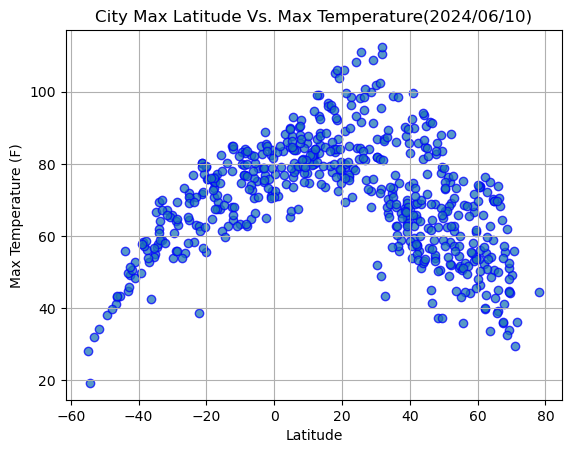

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(latitude, max_temp, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Max Temperature(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

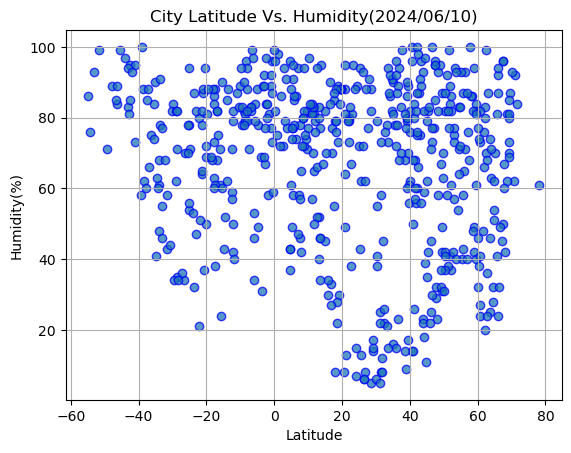

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

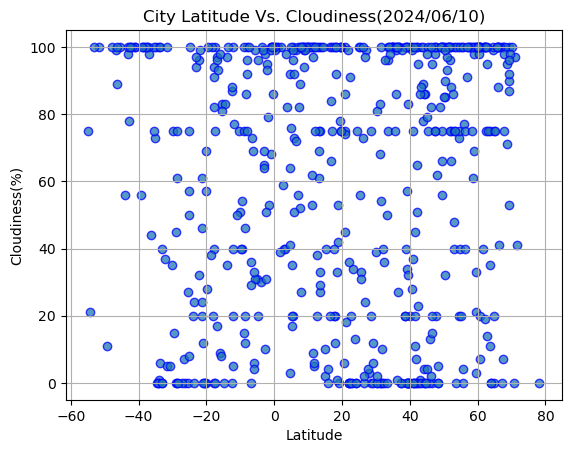

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

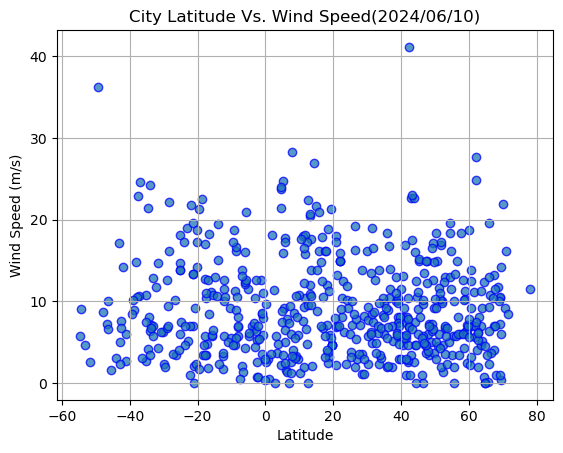

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%Y/%m/%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_val, y_val, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_val, y_val)
    regression_values = x_val * slope + intercept
    line_eqn = f" y = {slope: .2f} x  + {intercept: .2f})"

    plt.scatter(x_val,y_val)
    plt.plot(x_val, regression_values, "r-")
    plt.annotate(line_eqn,(min(x_val)+10, min(regression_values)-10), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sipalay,9.7500,122.5000,85.75,71,100,2.95,PH,1718007936
1,thompson,55.7435,-97.8558,35.76,87,0,0.00,CA,1718007936
4,vorgashor,67.5833,63.9500,35.80,96,100,6.98,RU,1718007936
5,klyuchi,52.2667,79.1667,88.38,37,66,1.28,RU,1718007937
6,altay,47.8667,88.1167,82.74,32,20,6.04,CN,1718007937


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kerikeri,-35.2268,173.9474,54.91,90,73,2.73,NZ,1718007936
3,kruisfontein,-34.0033,24.7314,61.88,48,1,6.40,ZA,1718007936
7,sorong,-0.8833,131.2500,82.36,77,100,3.53,ID,1718007937
9,port-aux-francais,-49.3500,70.2167,38.17,71,11,36.24,TF,1718007937
12,waitangi,-43.9535,-176.5597,55.81,97,56,3.00,NZ,1718007937


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6639806186674154


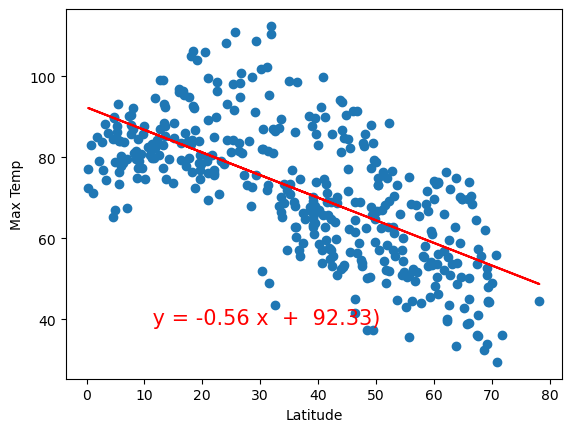

In [15]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Max Temp Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Max Temp")

The r-squared is: 0.8172477394020128


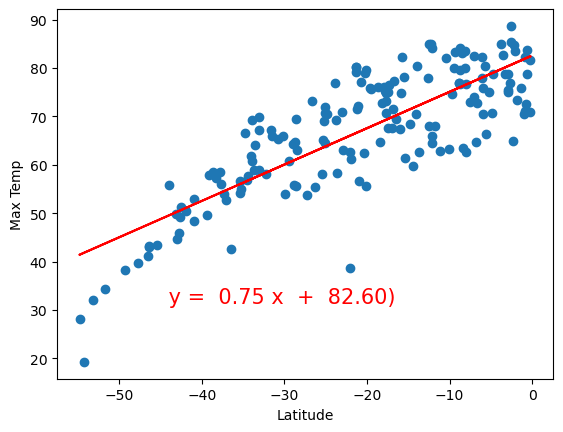

In [16]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Max Temp Vs.Latitude Linear Regression", xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.061312470921673363


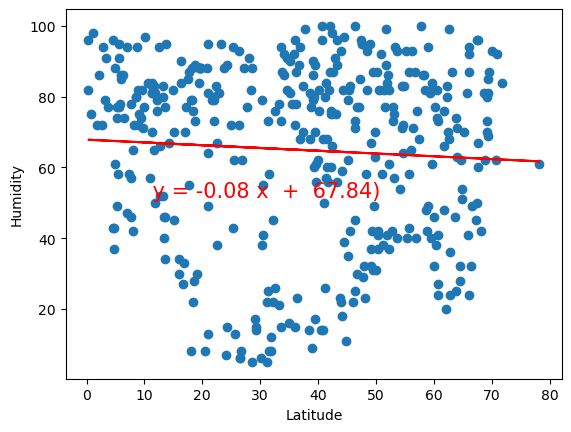

In [17]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Humidity Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Humidity")

The r-squared is: -0.010441684363343879


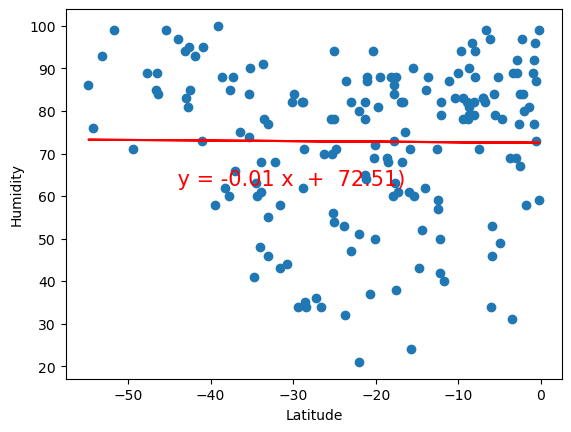

In [18]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Humidity Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.056725335402058354


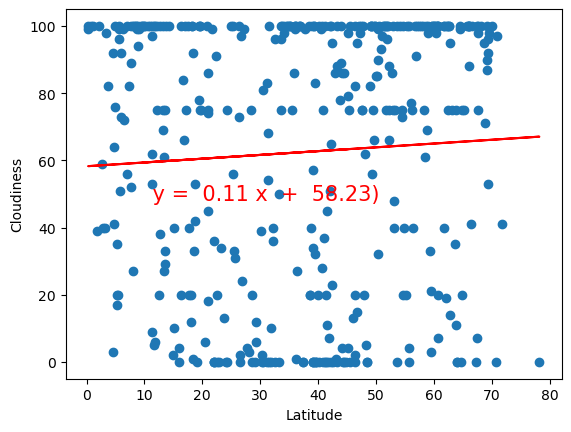

In [19]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Cloudiness Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

The r-squared is: -0.04526405191903375


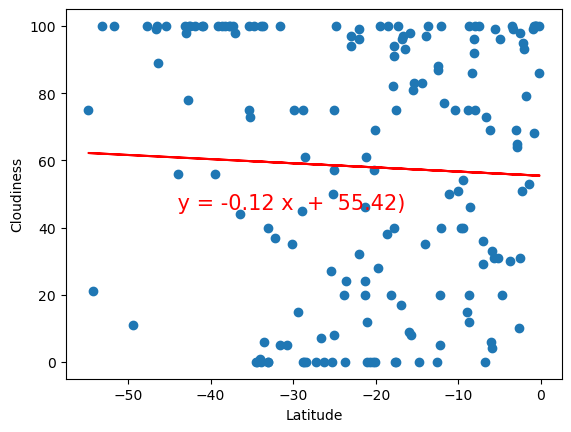

In [20]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Cloudiness Vs. Latitude Linear Regression", xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.07134839375168424


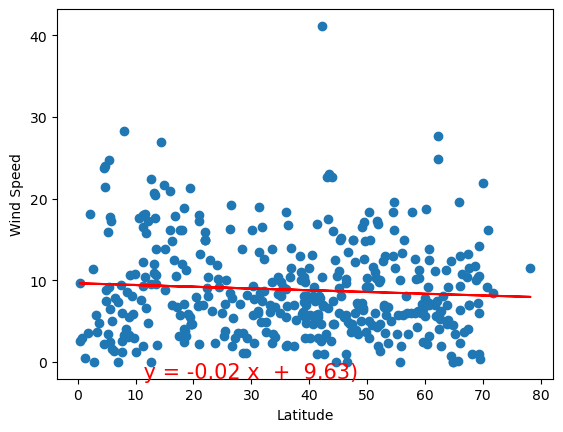

In [21]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
lin_reg_plot(x_val, y_val, title="Northern Hemisphere Max Temp Latitude Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

The r-squared is: -0.08787485641665017


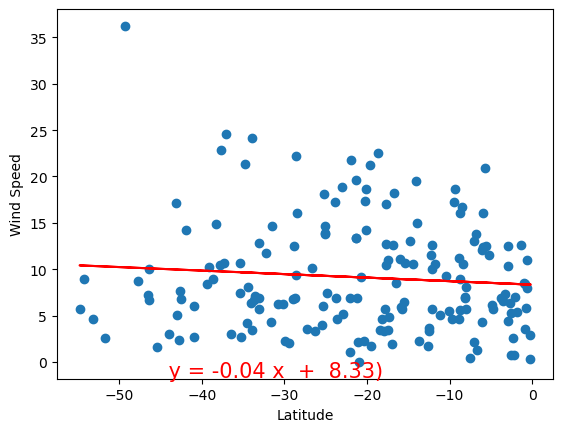

In [22]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
lin_reg_plot(x_val, y_val, title="Southern Hemisphere Max Temp Vs.Latitude Linear Regression", xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE